In [1]:
import numpy as np
import pandas as pd
import os
import pickle
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers#, models

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.utils import Sequence

from keras.models import Sequential, Model, load_model
from keras.layers.core import Dense, Activation
from keras.layers import Input
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout

from tensorflow.keras.optimizers import Adam, SGD 
from keras.optimizers import gradient_descent_v2 

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import os
cwd = os.getcwd()
cwd

'C:\\Users\\maria\\Jupiter_Notebooks\\Dataset_Thermal\\SeekThermal'

In [3]:
path_train = "../SeekThermal/Train"
path_test = "../SeekThermal/Test"

### Defining the class to load images   

In [4]:
class MasterImage0(object):

    def __init__(self,PATH='', IMAGE_SIZE = 128):
        self.PATH = PATH
        self.IMAGE_SIZE = IMAGE_SIZE

        self.image_data = []
        self.x_data = []
        self.y_data = []
        self.CATEGORIES = []

        # This will get List of categories
        self.list_categories = []

    def get_categories(self):
        for path in os.listdir(self.PATH):
            if '.DS_Store' in path:
                pass
            else:
                self.list_categories.append(path)
        print("Found Categories ",self.list_categories,'\n')
        return self.list_categories

    def process_image(self):
        try:
            """
            Return Numpy array of image
            :return: X_Data, Y_Data
            """
            self.CATEGORIES = self.get_categories()
            for categories in self.CATEGORIES:                                                  # Iterate over categories

                train_folder_path = os.path.join(self.PATH, categories)                         # Folder Path
                class_index = self.CATEGORIES.index(categories)                                 # this will get index for classification

                for img in os.listdir(train_folder_path):                                       # This will iterate in the Folder
                    new_path = os.path.join(train_folder_path, img)                             # image Path

                    try:        # if any image is corrupted
                        image_data_temp = cv2.imread(new_path)                 # Read Image as numbers
                        image_temp_resize = cv2.resize(image_data_temp,(self.IMAGE_SIZE,self.IMAGE_SIZE))
                        self.image_data.append([image_temp_resize,class_index])
                        random.shuffle(self.image_data)
                    except:
                        pass

            data = np.asanyarray(self.image_data)

            # Iterate over the Data
            for x in data:
                self.x_data.append(x[0])        # Get the X_Data
                self.y_data.append(x[1])        # get the label

            X_Data = np.asarray(self.x_data) / (255.0)      # Normalize Data
            Y_Data = np.asarray(self.y_data)
            
            # reshape x_Data

            X_Data = X_Data.reshape(-1, self.IMAGE_SIZE, self.IMAGE_SIZE, 3)
            print("Compiled X_data", self.X_data)
            return X_Data, Y_Data
        except:
            print("Failed to run Function Process Image ")

    def pickle_image(self):

        """
        :return: None Creates a Pickle Object of DataSet
        """
        # Call the Function and Get the Data
        X_Data,Y_Data = self.process_image()

        # Write the Entire Data into a Pickle File
        pickle_out = open('X_Data','wb')
        pickle.dump(X_Data, pickle_out)
        pickle_out.close()

        # Write the Y Label Data
        pickle_out = open('Y_Data', 'wb')
        pickle.dump(Y_Data, pickle_out)
        pickle_out.close()

        print("Pickled Image Successfully ")
        return X_Data,Y_Data
        print(self.X_Data)

    def load_dataset(self):

        try:
            # Read the Data from Pickle Object
            X_Temp = open('..\SeekThermal\X_Data','rb')
            X_Data = pickle.load(X_Temp)

            Y_Temp = open('..\SeekThermal\Y_Data','rb')
            Y_Data = pickle.load(Y_Temp)

            print('Reading Dataset from Pickle Object')

            return X_Data,Y_Data

        except:
            print('Could not Found Pickle File ')
            print('Loading File and Dataset  ..........')

            X_Data,Y_Data = self.pickle_image()
            print("X_data", self.X_Data)
            return X_Data,Y_Data
        

### Train data

In [5]:
a = MasterImage0(PATH = path_train,IMAGE_SIZE = 128)
a

In [6]:
a.get_categories()

Found Categories  ['Car', 'Cat', 'Man'] 



['Car', 'Cat', 'Man']

In [ ]:
#a.load_dataset()

In [7]:
(train_images, train_labels) = a.load_dataset()

Reading Dataset from Pickle Object


In [8]:
print(train_images.shape, train_labels.shape)

(4732, 224, 224, 3) (4732,)


In [9]:
train_labels

array([0, 0, 0, ..., 2, 2, 2])

In [10]:
# 3 categories - Car, Cat and Man
np.unique(train_labels)

array([0, 1, 2])

### Test data

In [11]:
class MasterImage1(object):

    def __init__(self,PATH='', IMAGE_SIZE = 300):
        self.PATH = PATH
        self.IMAGE_SIZE = IMAGE_SIZE

        self.image_data = []
        self.x_data = []
        self.y_data = []
        self.CATEGORIES = []

        # This will get List of categories
        self.list_categories = []

    def get_categories(self):
        for path in os.listdir(self.PATH):
            if '.DS_Store' in path:
                pass
            else:
                self.list_categories.append(path)
        print("Found Categories ",self.list_categories,'\n')
        return self.list_categories

    def process_image(self):
        try:
            """
            Return Numpy array of image
            :return: X_Data, Y_Data
            """
            self.CATEGORIES = self.get_categories()
            for categories in self.CATEGORIES:                                                  # Iterate over categories

                train_folder_path = os.path.join(self.PATH, categories)                         # Folder Path
                class_index = self.CATEGORIES.index(categories)                                 # this will get index for classification

                for img in os.listdir(train_folder_path):                                       # This will iterate in the Folder
                    new_path = os.path.join(train_folder_path, img)                             # image Path

                    try:        # if any image is corrupted
                        image_data_temp = cv2.imread(new_path)                 # Read Image as numbers
                        image_temp_resize = cv2.resize(image_data_temp,(self.IMAGE_SIZE,self.IMAGE_SIZE))
                        self.image_data.append([image_temp_resize,class_index])
                        random.shuffle(self.image_data)
                    except:
                        pass

            data = np.asanyarray(self.image_data)

            # Iterate over the Data
            for x in data:
                self.x_data.append(x[0])        # Get the X_Data
                self.y_data.append(x[1])        # get the label

            X_Data = np.asarray(self.x_data) / (255.0)      # Normalize Data
            Y_Data = np.asarray(self.y_data)

            # reshape x_Data

            X_Data = X_Data.reshape(-1, self.IMAGE_SIZE, self.IMAGE_SIZE, 3)

            return X_Data, Y_Data
        except:
            print("Failed to run Function Process Image ")

    def pickle_image(self):

        """
        :return: None Creates a Pickle Object of DataSet
        """
        # Call the Function and Get the Data
        X_Data,Y_Data = self.process_image()

        # Write the Entire Data into a Pickle File
        pickle_out = open('X1_Data','wb')
        pickle.dump(X_Data, pickle_out)
        pickle_out.close()

        # Write the Y Label Data
        pickle_out = open('Y1_Data', 'wb')
        pickle.dump(Y_Data, pickle_out)
        pickle_out.close()

        print("Pickled Image Successfully ")
        return X_Data,Y_Data

    def load_dataset(self):

        try:
            # Read the Data from Pickle Object
            X_Temp = open('..\SeekThermal\X1_Data','rb')
            X_Data = pickle.load(X_Temp)

            Y_Temp = open('..\SeekThermal\Y1_Data','rb')
            Y_Data = pickle.load(Y_Temp)

            print('Reading Dataset from Pickle Object')

            return X_Data,Y_Data

        except:
            print('Could not Found Pickle File ')
            print('Loading File and Dataset  ..........')

            X_Data,Y_Data = self.pickle_image()
            return X_Data,Y_Data

In [12]:
b = MasterImage1(PATH = path_test, IMAGE_SIZE = 128)
b

In [13]:
(test_images, test_labels) = b.load_dataset()

Reading Dataset from Pickle Object


In [14]:
test_images.shape

(1067, 224, 224, 3)

In [15]:
test_labels

array([0, 0, 0, ..., 2, 2, 2])

In [16]:
# 3 label categories

np.unique(test_labels)

array([0, 1, 2])

### Defining the Man images category as '1' vs  Car and Cat as '0'

In [17]:
### Defining Man as 1 vs the other categories
test_labels_binary0 = np.where(test_labels==1, 0, test_labels) 
test_labels_binary0

array([0, 0, 0, ..., 2, 2, 2])

In [18]:
test_labels_binary = np.where(test_labels==2, 1, test_labels_binary0)

np.unique(test_labels_binary)

array([0, 1])

In [19]:
### Man
train_labels_binary0 = np.where(train_labels==1, 0, train_labels) 
train_labels_binary0

array([0, 0, 0, ..., 2, 2, 2])

In [20]:
train_labels_binary = np.where(train_labels==2, 1, train_labels_binary0)

train_labels_binary 

array([0, 0, 0, ..., 1, 1, 1])

##    Lets see what a random image looks like

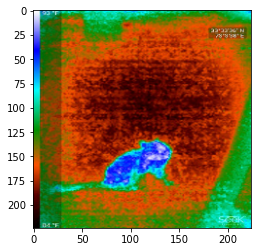

In [23]:
import random
from keras.preprocessing.image import ImageDataGenerator, load_img
sample = random.choice(test_images)

plt.imshow(sample)

### Defining Train and Test images

In [24]:
test_labels_binary = test_labels_binary.reshape(test_labels_binary.shape[0],1)
train_labels_binary = train_labels_binary.reshape(train_labels_binary.shape[0],1)

In [25]:
# Dataset shapes
print('Train: X_images=%s, y_labels=%s' % (train_images.shape, train_labels_binary.shape))
print('Test: X_images=%s, y_labels=%s' % (test_images.shape, test_labels_binary.shape))

Train: X_images=(4732, 224, 224, 3), y_labels=(4732, 1)
Test: X_images=(1067, 224, 224, 3), y_labels=(1067, 1)


In [26]:
# Setting 17% of the training set as a validation set

#validation set
X_val_images = train_images[-800:]
y_val_labels = train_labels_binary[-800:]

#training set
X_train_images = train_images[:-800]
y_train_labels = train_labels_binary[:-800]

In [27]:
print('Train: X_train_images=%s, y_train_labels=%s' % (X_train_images.shape, y_train_labels.shape))
print('Validation: X_val_images=%s, y_val_labels=%s' % (X_val_images.shape, y_val_labels.shape))

Train: X_train_images=(3932, 224, 224, 3), y_train_labels=(3932, 1)
Validation: X_val_images=(800, 224, 224, 3), y_val_labels=(800, 1)


In [30]:
X_train_images.shape[1:]

(224, 224, 3)

### Building a model

In [ ]:
X_train_images = (X_train_images.batch(batch_size=32, drop_remainder=True))
test_images = (test_images.batch(batch_size=32, drop_remainder=True))
X_val_images = (X_val_images.batch(batch_size=32, drop_remainder=True))

### Using ResNet pre-trained model

In [29]:
#Load Resnet50 model without classifier layers
#resnet= ResNet50(include_top=False,weights='imagenet',input_shape=X_train_images.shape[1:])

resnet= ResNet50(include_top=True,weights='imagenet' , classes = 2, classifier_activation="softmax")#,input_shape=X_train_images.shape[1:])

#Add new classifier layers
layer = Flatten()(resnet.output)
#layer = Dense(500,activation='relu')(layer)
#layer = Dropout(0.15)(layer)
layer = Dense(250,activation='relu')(layer)
layer = Dropout(0.15)(layer)
output = Dense(1,activation='sigmoid')(layer)

#Define Resnet50 model
model_resnet = resnet(resnet.inputs,output)


model_resnet.summary()

ValueError: If using `weights` as `"imagenet"` with `include_top` as true, `classes` should be 1000

In [35]:
#Load ResNet50 model without classifier layers
ResNet = ResNet50(include_top=False,weights='imagenet',input_shape=X_train_images.shape[1:])

#Add new classifier layers
layer = Flatten()(ResNet.output)
layer = Dense(500,activation='relu')(layer)
layer = Dense(250,activation='relu')(layer)
output = Dense(1,activation='sigmoid')(layer)


#Define ResNet50 model
model_ResNet50 = Model(ResNet.inputs,output)



In [36]:
optimizer = Adam(learning_rate=0.001)
model_ResNet50.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

#Summarize
model_ResNet50.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [40]:
#Train Resnet50 model
#resnet_trained_model = model_ResNet50.fit( X_train_images, y_train_labels, validation_data=(X_val_images, y_val_labels), epochs=200)



In [39]:
# Define batches manually so it does not run out of memory. Batch = 16. 

class DataGenerator(Sequence):
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y

train_gen = DataGenerator(X_train_images, y_train_labels, 16)
test_gen = DataGenerator(X_val_images, y_val_labels, 16)


trained_model_resnet = model_ResNet50.fit(train_gen, epochs=100,validation_data=test_gen)

Epoch 1/100
246/246 [==============================] - 56s 166ms/step - loss: 4.2088 - accuracy: 0.7368 - val_loss: 0.7236 - val_accuracy: 0.0000e+00
Epoch 2/100
246/246 [==============================] - 37s 152ms/step - loss: 0.5894 - accuracy: 0.7503 - val_loss: 0.7647 - val_accuracy: 0.0000e+00
Epoch 3/100
246/246 [==============================] - 37s 152ms/step - loss: 0.6181 - accuracy: 0.7480 - val_loss: 0.8146 - val_accuracy: 0.0000e+00
Epoch 4/100
246/246 [==============================] - 37s 152ms/step - loss: 0.7164 - accuracy: 0.7208 - val_loss: 28.1656 - val_accuracy: 0.2288
Epoch 5/100
246/246 [==============================] - 38s 152ms/step - loss: 0.5324 - accuracy: 0.7724 - val_loss: 37.8188 - val_accuracy: 0.3050
Epoch 6/100
246/246 [==============================] - 38s 153ms/step - loss: 0.4356 - accuracy: 0.8006 - val_loss: 3.2034 - val_accuracy: 0.1400
Epoch 7/100
246/246 [==============================] - 38s 153ms/step - loss: 0.2945 - accuracy: 0.8817 - val_

Epoch 56/100
246/246 [==============================] - 38s 154ms/step - loss: 2.4515e-08 - accuracy: 1.0000 - val_loss: 6.0980 - val_accuracy: 0.2700
Epoch 57/100
246/246 [==============================] - 38s 154ms/step - loss: 2.1571e-08 - accuracy: 1.0000 - val_loss: 5.3122 - val_accuracy: 0.3225
Epoch 58/100
246/246 [==============================] - 38s 154ms/step - loss: 1.9024e-08 - accuracy: 1.0000 - val_loss: 5.3440 - val_accuracy: 0.3225
Epoch 59/100
246/246 [==============================] - 38s 154ms/step - loss: 1.6843e-08 - accuracy: 1.0000 - val_loss: 6.9918 - val_accuracy: 0.2188
Epoch 60/100
246/246 [==============================] - 38s 154ms/step - loss: 1.4954e-08 - accuracy: 1.0000 - val_loss: 6.2302 - val_accuracy: 0.2675
Epoch 61/100
246/246 [==============================] - 38s 154ms/step - loss: 1.3244e-08 - accuracy: 1.0000 - val_loss: 6.5549 - val_accuracy: 0.2600
Epoch 62/100
246/246 [==============================] - 38s 154ms/step - loss: 1.1836e-08 - ac

In [41]:
scores = model_ResNet50.evaluate(test_images, test_labels_binary, verbose=0)
print("ResNet50 Accuracy on Test Set: %.2f%%" % (scores[1]*100))

ResNet50 Accuracy on Test Set: 77.79%


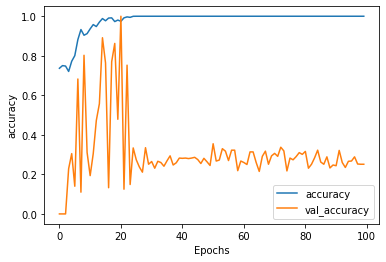

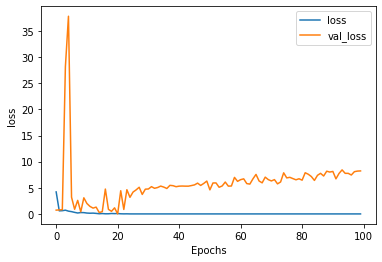

In [42]:
def plot_graphs(trained_model_resnet, string):
    plt.plot(trained_model_resnet.history[string])
    plt.plot(trained_model_resnet.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
    
  #Plot the accuracy and loss
plot_graphs(trained_model_resnet, "accuracy")
plot_graphs(trained_model_resnet, "loss")

##### Model with Regularisation

In [55]:
ResNet = ResNet50(include_top=False,weights='imagenet',input_shape=X_train_images.shape[1:])

#Add new classifier layers

layer = Flatten()(ResNet.output)
layer = Dense(500,activation='relu')(layer)
layer = Dropout(0.15)(layer)
layer = Dense(250,activation='relu')(layer)
layer = Dropout(0.15)(layer)
output = Dense(1,activation='sigmoid')(layer)


#Define Resnet50 model
model_resnet = Model(ResNet.inputs,output)


model_resnet.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_11[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [56]:
optimizer = Adam(learning_rate=0.001)
model_ResNet50.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])


In [52]:
class DataGenerator(Sequence):
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y

train_gen = DataGenerator(X_train_images, y_train_labels, 16)
test_gen = DataGenerator(X_val_images, y_val_labels, 16)


trained_model_resnet = model_ResNet50.fit(train_gen, epochs=100,validation_data=test_gen)

Epoch 1/100
246/246 [==============================] - 43s 155ms/step - loss: 2.5703e-10 - accuracy: 1.0000 - val_loss: 8.8930 - val_accuracy: 0.2412
Epoch 2/100
246/246 [==============================] - 37s 152ms/step - loss: 1.6149e-10 - accuracy: 1.0000 - val_loss: 9.1215 - val_accuracy: 0.2438
Epoch 3/100
246/246 [==============================] - 37s 151ms/step - loss: 1.1067e-10 - accuracy: 1.0000 - val_loss: 9.0493 - val_accuracy: 0.2512
Epoch 4/100
246/246 [==============================] - 37s 151ms/step - loss: 8.1510e-11 - accuracy: 1.0000 - val_loss: 9.2886 - val_accuracy: 0.2512
Epoch 5/100
246/246 [==============================] - 37s 151ms/step - loss: 6.4607e-11 - accuracy: 1.0000 - val_loss: 8.9826 - val_accuracy: 0.2750
Epoch 6/100
246/246 [==============================] - 37s 152ms/step - loss: 5.2372e-11 - accuracy: 1.0000 - val_loss: 8.2233 - val_accuracy: 0.3162
Epoch 7/100
246/246 [==============================] - 37s 152ms/step - loss: 4.9598e-11 - accuracy:

246/246 [==============================] - 38s 153ms/step - loss: 6.0684e-11 - accuracy: 1.0000 - val_loss: 10.2330 - val_accuracy: 0.2537
Epoch 56/100
246/246 [==============================] - 38s 153ms/step - loss: 6.0785e-11 - accuracy: 1.0000 - val_loss: 9.6080 - val_accuracy: 0.2862
Epoch 57/100
246/246 [==============================] - 38s 153ms/step - loss: 6.0895e-11 - accuracy: 1.0000 - val_loss: 10.2103 - val_accuracy: 0.2575
Epoch 58/100
246/246 [==============================] - 38s 153ms/step - loss: 6.1024e-11 - accuracy: 1.0000 - val_loss: 11.4035 - val_accuracy: 0.2163
Epoch 59/100
246/246 [==============================] - 38s 153ms/step - loss: 6.1178e-11 - accuracy: 1.0000 - val_loss: 10.6572 - val_accuracy: 0.2450
Epoch 60/100
246/246 [==============================] - 38s 153ms/step - loss: 6.1361e-11 - accuracy: 1.0000 - val_loss: 10.2538 - val_accuracy: 0.2637
Epoch 61/100
246/246 [==============================] - 38s 153ms/step - loss: 6.1466e-11 - accuracy: 

In [53]:
scores = model_ResNet50.evaluate(test_images, test_labels_binary, verbose=0)
print("ResNet50 Accuracy on Test Set: %.2f%%" % (scores[1]*100))

ResNet50 Accuracy on Test Set: 75.91%


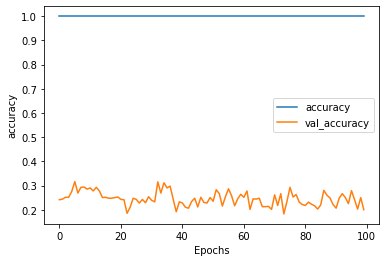

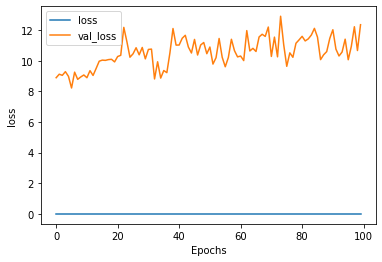

In [54]:
def plot_graphs(trained_model_resnet, string):
    plt.plot(trained_model_resnet.history[string])
    plt.plot(trained_model_resnet.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
    
  #Plot the accuracy and loss
plot_graphs(trained_model_resnet, "accuracy")
plot_graphs(trained_model_resnet, "loss")

In [ ]:
# Save the best model with early stopping and checkpoint
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
#mc = ModelCheckpoint('../SeekThermal/resnet50_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fit model
#history = model_ResNet50.fit(X_train_images, y_train_labels,  validation_data=(X_val_images, y_val_labels), epochs=200, verbose=0, callbacks=[es, mc])
# load the saved model
#saved_model = load_model('../SeekThermal/resnet50_best_model.h5')
# evaluate the model
#_, train_acc = saved_model.evaluate(X_train_images, y_train_labels, verbose=0)
#_, test_acc = saved_model.evaluate(test_images, test_labels_binary, verbose=0)
#print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))